In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Acer\Desktop\Amazon Sale Report.csv")

In [3]:
data.shape
# 128976 rows and 21 columns in the dataframe

(128976, 19)

In [4]:
data.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
# New and Pendings have no values hence, needs to be dropped.
# dropping unrelated/blank columns
# data.drop(['New','PendingS'],axis=1, inplace=True)

In [8]:
# to check the null values
pd.isnull(data)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [9]:
pd.isnull(data).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(37514, 19)

In [12]:
# change data type
data['ship-postal-code'] = data['ship-postal-code'].astype('Int64')
# here we used 'Int64, because it allows NaN values to remain in the column while keeping it in integer format.'
data['ship-postal-code'].dtype


Int64Dtype()

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
data.describe()
# describe() method return description of the data in the DataFrame(i.e count, mean, std etc)
# cannot be used for object, but numbers.

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.0
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.0
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.0
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.0
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.0
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.0
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [15]:
data.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [16]:
data[['Qty','Amount']].describe()
# if we want to specifically target columns and see their statistical analysis

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Exploratory Data Analysis

In [17]:
data.size
# size = number of rows×number of columns

712766

In [30]:
data.head(8)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
14,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,L,Shipped,1,INR,771.00,MUMBAI,MAHARASHTRA,400053,IN,False,Easy Ship
15,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,6XL,Shipped,1,INR,544.00,GUNTAKAL,ANDHRA PRADESH,515801,IN,False,Easy Ship
18,18,402-4030358-5835511,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XXL,Shipped,1,INR,458.00,Gurgaon,HARYANA,122004,IN,False,Easy Ship


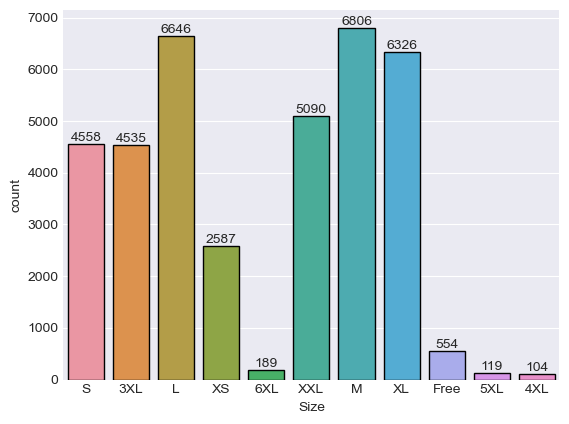

In [31]:
# we use seaborn to check size
ax = sns.countplot(x='Size', data=data, edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container)

From above graph we can see most of the people buy M-size, followed with L-size.

In [20]:
quant = data.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)


<Axes: xlabel='Size', ylabel='Qty'>

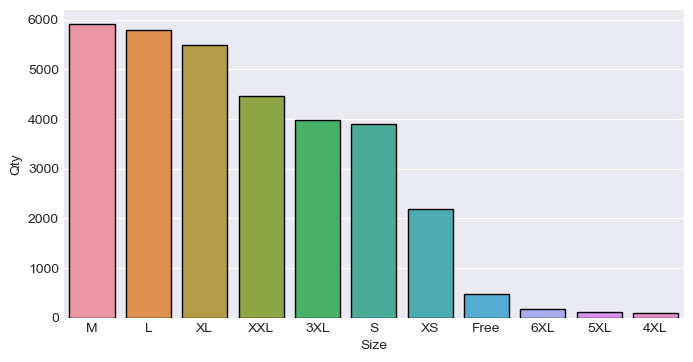

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x='Size',y='Qty',data=quant,edgecolor = 'black')

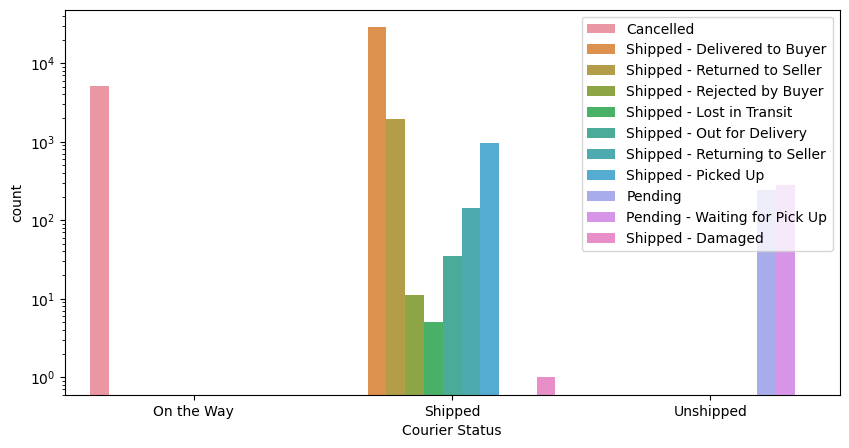

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Courier Status', hue='Status')

plt.yscale('log')
plt.legend(loc='upper right') 


Using Logarathmic Scale: 
In a logarithmic scale, each step up represents a multiplicative increase (e.g., 1, 10, 100, 1000, 10000), which compresses larger values and stretches smaller values. 
This allows smaller counts to be more visible without being overshadowed by much larger counts.

A log scale reduces the visual dominance of the largest bars, making the smaller ones more distinguishable, as it "compresses" the height of tall bars.

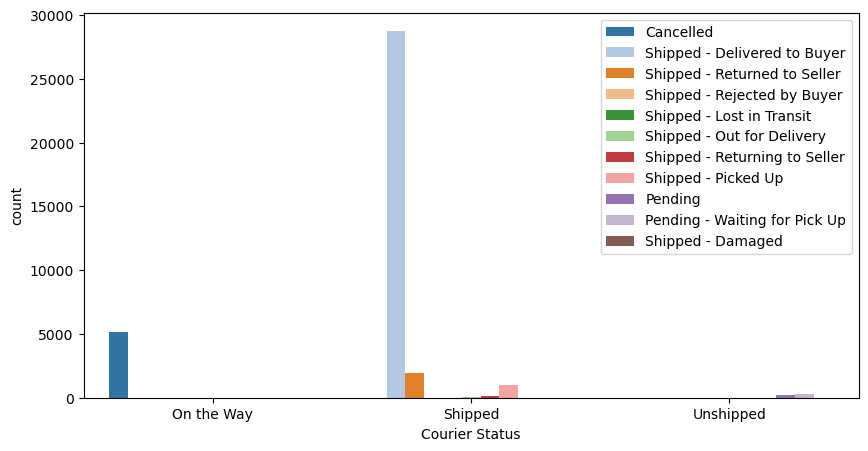

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Courier Status', hue='Status', palette="tab20")
plt.legend(loc='upper right') 


C:\Users\Acer\AppData\Local\Temp\ipykernel_9608\2512735201.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Frequency')

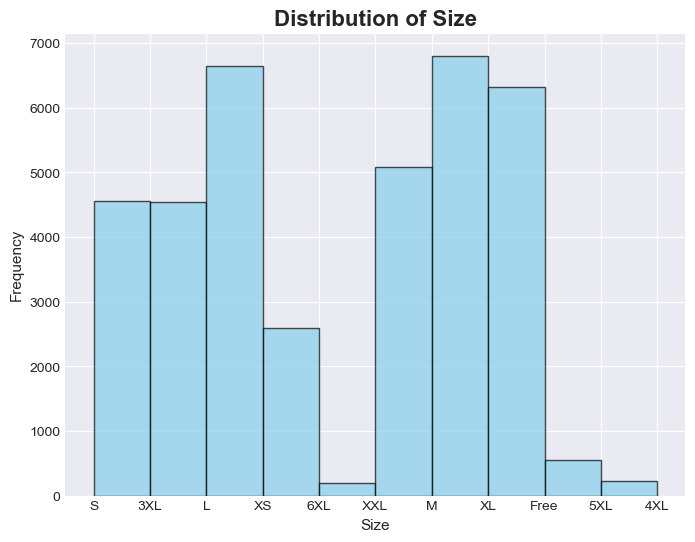

In [24]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid') 
# Plot the histogram with enhancements
data.loc[:,'Size'].hist(
    bins=10,             
    color='skyblue',    
    edgecolor='black',  
    alpha=0.7            
)
plt.title('Distribution of Size', fontsize=16, weight='bold')
plt.xlabel('Size', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

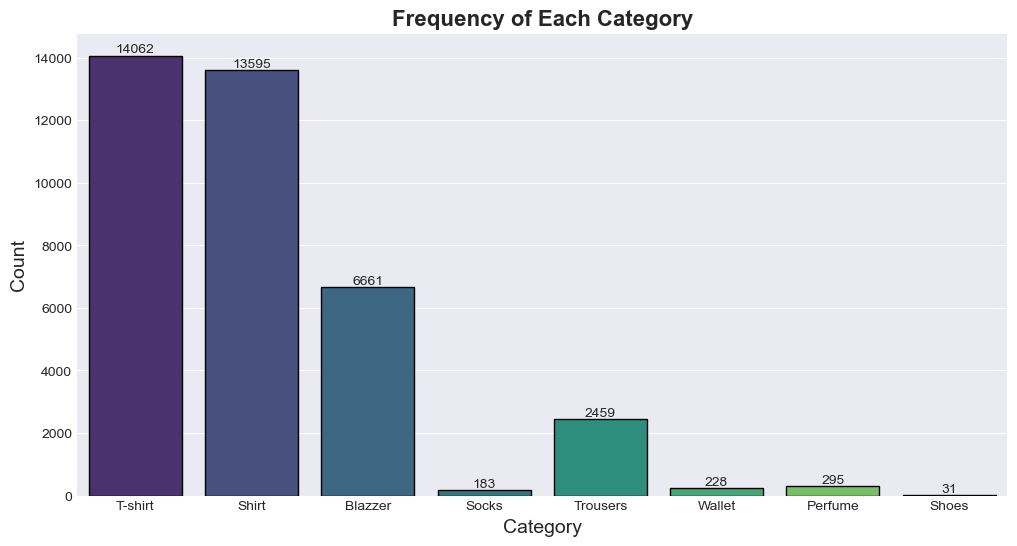

In [25]:
plt.figure(figsize=(12, 6))
ay= sns.countplot(data=data, x='Category', palette='viridis', edgecolor='black')
for container in ay.containers:
    ay.bar_label(container)
plt.title('Frequency of Each Category', fontsize=16, weight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

From above graph you can see that most of the buyers are T-shirt, having the count of 14,062

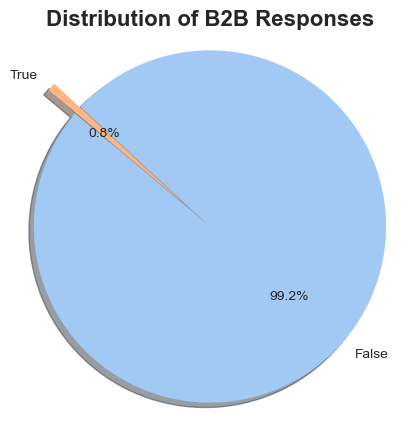

In [36]:
B2B_Check = data['B2B'].value_counts()
colors = sns.color_palette('pastel')[0:len(B2B_Check)] 
explode = [0.1] * len(B2B_Check) 
plt.figure(figsize=(5, 5))
plt.pie(
    B2B_Check,
    labels=B2B_Check.index,
    autopct='%1.1f%%',
    startangle=140,  
    colors=colors,
    explode=explode,
    shadow=True  
)
# Equal aspect ratio ensures that pie chart is a circle
plt.axis('equal')
plt.title('Distribution of B2B Responses', fontsize=16, weight='bold')
plt.show()


From the above chart we can see that, maximum i.e 99.2% buyers are retailers and 0.8% are B2B buyers.

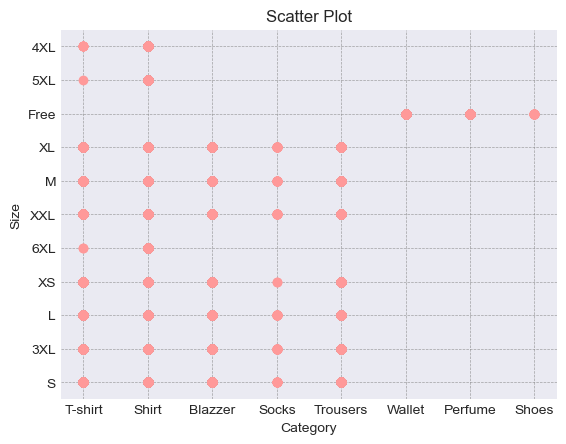

In [37]:
# we use scatter plot to find how many data and how much and different types of size
x_data = data['Category']
y_data = data['Size']

#pastel color palette
pastel_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.scatter(x_data, y_data, color=pastel_colors[0]) 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()


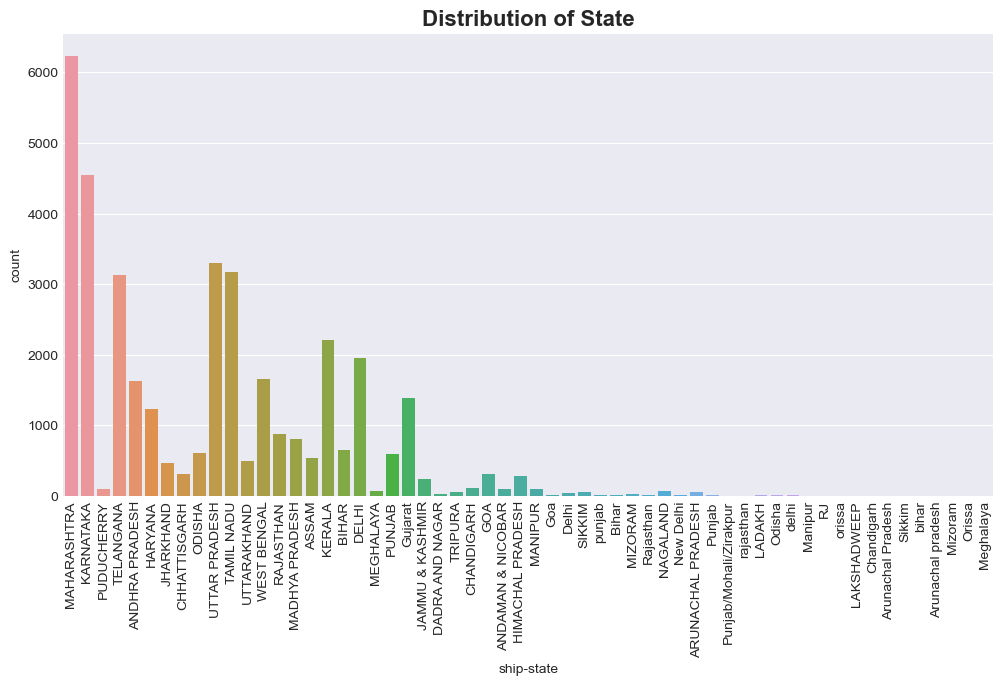

In [28]:
plt.figure(figsize=(12,6))
ay = sns.countplot(data=data, x='ship-state')

plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State', fontsize=16, weight='bold')
plt.xticks(rotation=90)
plt.show()

ship-state
MAHARASHTRA       6236
KARNATAKA         4550
UTTAR PRADESH     3298
TAMIL NADU        3167
TELANGANA         3136
KERALA            2213
DELHI             1955
WEST BENGAL       1653
ANDHRA PRADESH    1621
Gujarat           1382
Name: count, dtype: int64


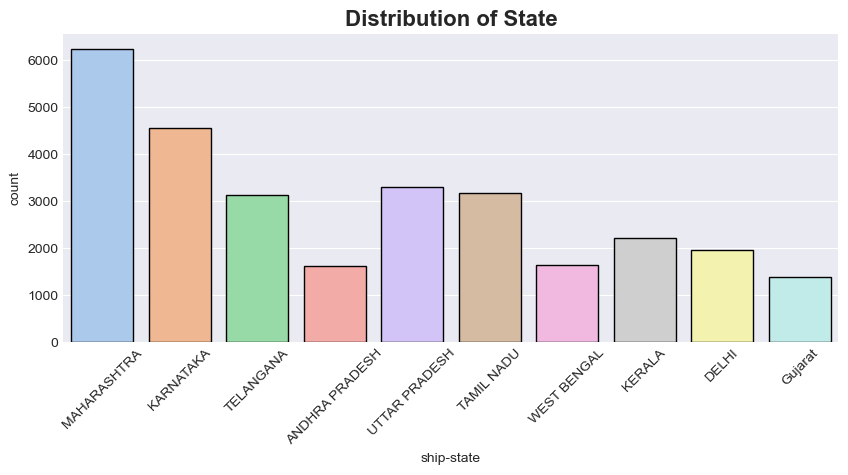

In [29]:
# Top 10 states
top_10_states = data['ship-state'].value_counts().head(10)
print(top_10_states)
# Plot count of cities by state
plt.figure(figsize=(10,4))
colors = sns.color_palette('pastel')
sns.countplot(data=data[data['ship-state'].isin(top_10_states.index)], x= 'ship-state', palette=colors, edgecolor='black')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State', fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.show()

From above graph you can see that most of the buyers are from Maharashtra state.

# Conclusion


The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfils orders through Amazon, exeriences high demand for T-shirts, and sees M-size as the preferred choice among buyers.